In [1]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint


In [2]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
dir_list = os.listdir('C:\\ravdesss')
dir_list.sort()

            0
0            
angry     192
disgust   192
fear      192
happy     192
neutral   288
sad       192
surprise  192


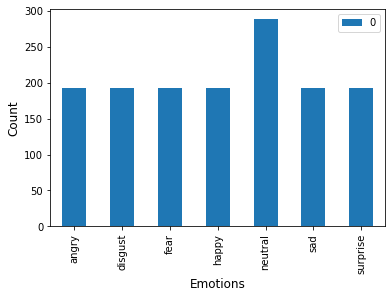

In [4]:
emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir('C:\\ravdesss' +'\\'+ i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append("C:\\ravdesss" +"\\"+ i + "\\" + f)

        
RAV_df = pd.DataFrame(emotion)
Y1=RAV_df
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
data1=RAV_df[0]
data=pd.DataFrame(data1)
emotioncount = data.pivot_table(index = [0], aggfunc ='size')
emotion_count=emotioncount.to_frame()
type(emotion_count)
print(emotion_count)

emotion_count.plot( kind = 'bar')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.show()

In [5]:
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','Emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.Emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender'], axis=1)
RAV_df.labels.value_counts()
RAV_df.to_csv("rav.csv",index=False)
RAV_df.head()

,Emotion,labels,source,path
0,neutral,male_neutral,RAVDESS,C:\ravdesss\Actor_01\03-01-01-01-01-01-01.wav
1,neutral,male_neutral,RAVDESS,C:\ravdesss\Actor_01\03-01-01-01-01-02-01.wav
2,neutral,male_neutral,RAVDESS,C:\ravdesss\Actor_01\03-01-01-01-02-01-01.wav
3,neutral,male_neutral,RAVDESS,C:\ravdesss\Actor_01\03-01-01-01-02-02-01.wav
4,neutral,male_neutral,RAVDESS,C:\ravdesss\Actor_01\03-01-02-01-01-01-01.wav


In [6]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()


In [7]:
def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

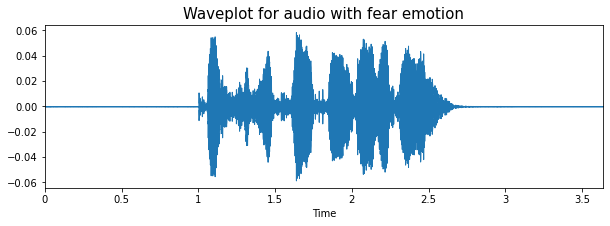

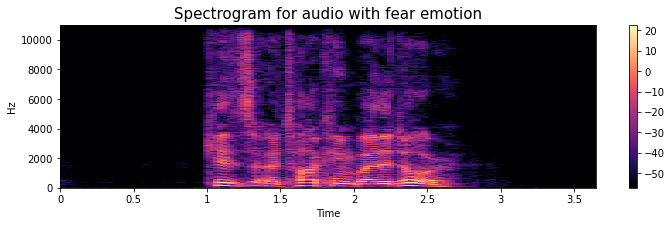

In [8]:
emotion='fear'
path=np.array(RAV_df.path[RAV_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
 
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


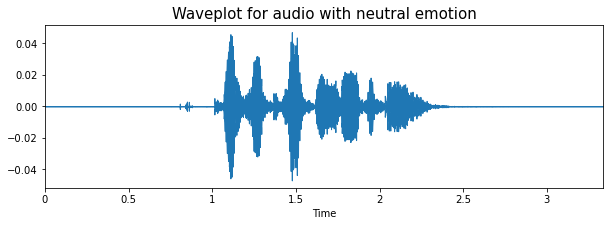

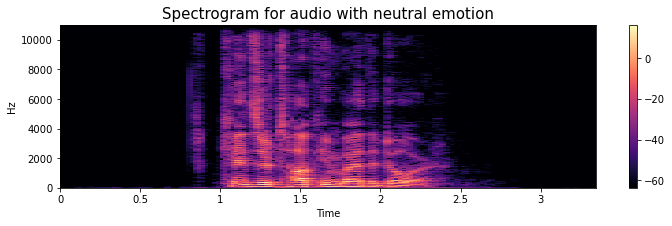

In [9]:
emotion='neutral'
path=np.array(RAV_df.path[RAV_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
 
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


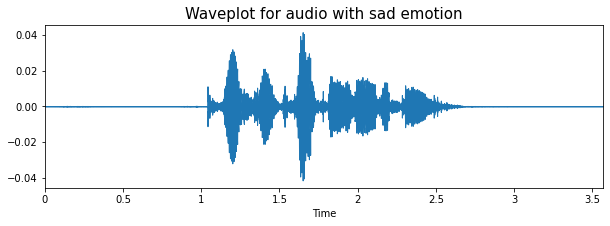

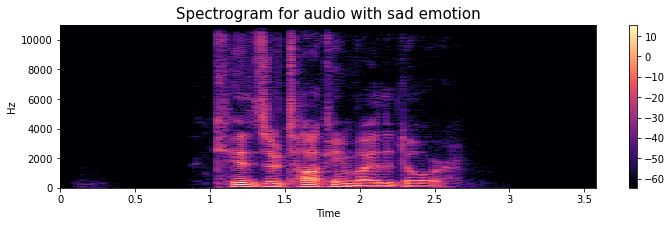

In [10]:
emotion='sad'
path=np.array(RAV_df.path[RAV_df.Emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
 
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [11]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

# taking any example and checking for techniques.
path = np.array(RAV_df.path)[1]
data, sample_rate = librosa.load(path)

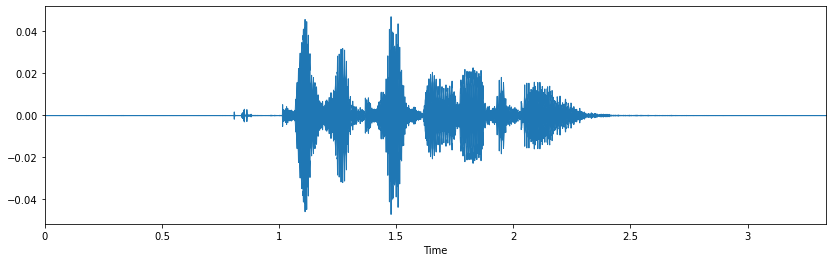

In [12]:
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

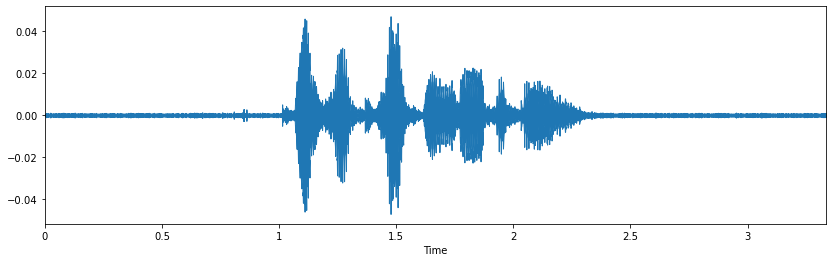

In [14]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

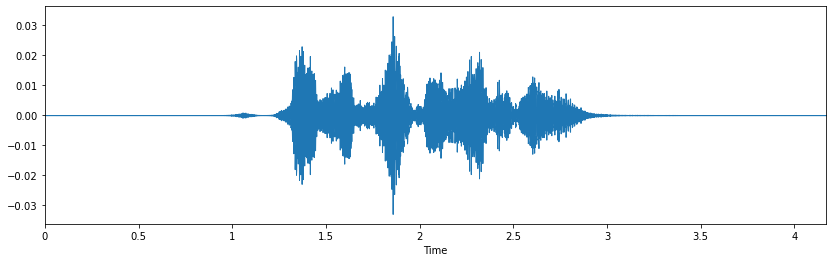

In [15]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

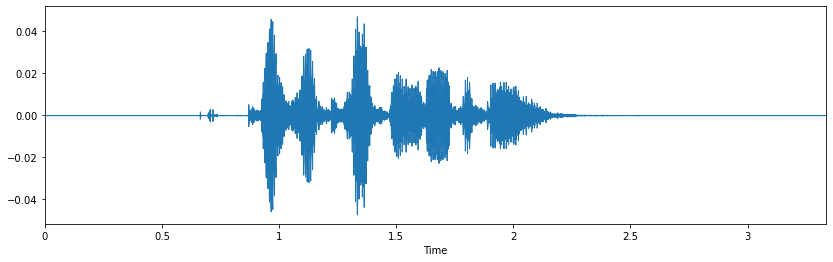

In [16]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

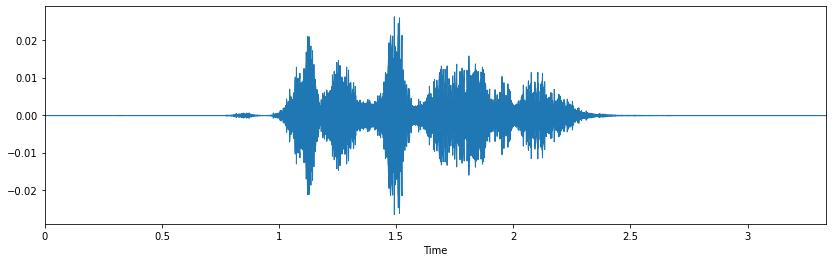

In [17]:
x = pitch(data, sample_rate)
plt.figure(figsize=(14,4))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [18]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result


In [19]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    
    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)
    
    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2)) # stacking vertically
    
    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3)) # stacking vertically
    
    return result

In [20]:

X, Y = [], []
for path, emotion in zip(RAV_df.path, RAV_df.Emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)



In [13]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

NameError: name 'X' is not defined

In [36]:
Features=pd.read_csv('features.csv')

In [37]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [38]:
encoder = OneHotEncoder()
Y1 = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y1, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((3240, 162), (3240, 7), (1080, 162), (1080, 7))

In [40]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162), (3240, 7), (1080, 162), (1080, 7))

In [41]:
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3240, 162, 1), (3240, 7), (1080, 162, 1), (1080, 7))

In [42]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=7, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])


In [43]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 162, 256)          1536      
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 81, 256)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 81, 256)           327936    
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 41, 256)           0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 41, 128)           163968    
_________________________________________________________________
max_pooling1d_14 (MaxPooling (None, 21, 128)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 21, 128)          

In [44]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history=model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_test, y_test), callbacks=[rlrp])

Epoch 1/20
51/51 [==============================] - 7s 133ms/step - loss: 1.9153 - accuracy: 0.1930 - val_loss: 1.7798 - val_accuracy: 0.3056
Epoch 2/20
51/51 [==============================] - 7s 128ms/step - loss: 1.8137 - accuracy: 0.2815 - val_loss: 1.7070 - val_accuracy: 0.3241
Epoch 3/20
51/51 [==============================] - 7s 142ms/step - loss: 1.7428 - accuracy: 0.3143 - val_loss: 1.6469 - val_accuracy: 0.3694
Epoch 4/20
51/51 [==============================] - 7s 145ms/step - loss: 1.7187 - accuracy: 0.3237 - val_loss: 1.6191 - val_accuracy: 0.3954
Epoch 5/20
51/51 [==============================] - 7s 138ms/step - loss: 1.6840 - accuracy: 0.3488 - val_loss: 1.5443 - val_accuracy: 0.4250
Epoch 6/20
51/51 [==============================] - 7s 137ms/step - loss: 1.6344 - accuracy: 0.3657 - val_loss: 1.5450 - val_accuracy: 0.4315
Epoch 7/20
51/51 [==============================] - 7s 145ms/step - loss: 1.6132 - accuracy: 0.3659 - val_loss: 1.4860 - val_accuracy: 0.4509
Epoch 

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(sx1_train,sy_train)
y_pred = clf.predict(sx1_test)
print(accuracy_score(sy_test,y_pred))


In [41]:
 import pickle
 s = pickle.dumps(clf)
clf2 = pickle.loads(s)
y_pred = clf2.predict(sx1_test)
print(accuracy_score(sy_test,y_pred))

0.5935185185185186


In [34]:
sx_train, sx_test, sy_train,sy_test = train_test_split(X, Y00, random_state=0, shuffle=True)


In [45]:
Y0=[]

In [63]:
Y0=y_test
Y.shape

(4320,)

In [60]:
for i in Y:
    if i==('neutral'):
        Ye.append('1')
    elif i==('happy'):
         Ye.append('2')
    elif i==('sad'):
         Ye.append('3')
    elif i==('angry'):
         Ye.append('4')
    elif i==('fear'):
         Ye.append('5')
    elif i==('disgust'):
         Ye.append('6')
    elif i==('suprise'):
         Ye.append('7')
            

In [49]:
Ye=[]

In [ ]:
({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})

numpy.ndarray

In [31]:
ye=np.array(Y)
df=pd.DataFrame(ye)
df.replace({'neutral':1, 'neutral':2, 'happy':3, 'sad':4, 'angry':5, 'fear':6, 'disgust':7, 'surprise':8})

,0
0,2
1,2
2,2
3,2
4,2
...,...
4315,8
4316,8
4317,8
4318,8


In [32]:
Y00=df.to_numpy()
Y00

array([['neutral'],
       ['neutral'],
       ['neutral'],
       ...,
       ['surprise'],
       ['surprise'],
       ['surprise']], dtype=object)

In [46]:
from keras.layers.recurrent import LSTM, GRU

In [49]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(7, activation = "linear"))

model.compile(loss='mse', optimizer='adam')

print ('model compiled')

print (model.summary())

model compiled
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 162, 50)           10400     
_________________________________________________________________
dropout_10 (Dropout)         (None, 162, 50)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 7)                 707       
Total params: 71,507
Trainable params: 71,507
Non-trainable params: 0
_________________________________________________________________
None


In [50]:
model.fit(x_train, y_train, batch_size=512, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
7/7 [==============================] - 12s 1s/step - loss: 0.1376 - val_loss: 0.1219
Epoch 2/10
7/7 [==============================] - 8s 1s/step - loss: 0.1218 - val_loss: 0.1171
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.1185 - val_loss: 0.1171
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.1177 - val_loss: 0.1155
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.1174 - val_loss: 0.1150
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.1166 - val_loss: 0.1160
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.1163 - val_loss: 0.1153
Epoch 8/10
7/7 [==============================] - 9s 1s/step - loss: 0.1166 - val_loss: 0.1146
Epoch 9/10
7/7 [==============================] - 10s 2s/step - loss: 0.1163 - val_loss: 0.1152
Epoch 10/10
7/7 [==============================] - 10s 1s/step - loss: 0.1163 - val_loss: 0.1139
